In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fma
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
# %matplotlib inline
pd.set_option('display.width', 600)
pd.set_option('display.max_columns', 14)
mpl.rcParams['axes.unicode_minus'] = False
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_rows', None)

In [2]:
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['font.size'] = 15

df=pd.read_csv('D:/Jupyter_Project_22/python_project_01/Final_for_quant/PCA/cleaned_integrated_b.csv',index_col=0)
df = df.dropna()

In [3]:
tickers=['BEL 20_2007-01-02-2022-01-25', 'CAC 40_2007-01-02-2022-01-25', 'DAX PERFORMANCE-INDEX_2007-01-02-2022-01-25', 'Dow Jones Industrial Average_2007-01-03-2022-01-25', 'ESTX 50 PR', 'Euronext 100 Index_2007-01-02-2022-01-25', 'FTSE 100_2007-01-02-2022-01-25', 'FTSE Bursa Malaysia KLCI_2007-01-03-2022-01-25', 'futures_BRENT_OIL', 'futures_COCOA', 'futures_Coffee', 'futures_COPPER', 'futures_CORN', 'futures_COTTON', 'futures_CRUDE_OIL', 'futures_DOW', 'futures_FEEDER_CATTLE', 'futures_GOLD', 'futures_LEAN_HOGS', 'futures_LIVE_CATTLE', 'futures_LUMBER', 'futures_NASDAQ',
       'futures_NATURAL_GAS', 'futures_OAT', 'futures_PALLADIUM', 'futures_PLATINUM', 'futures_ROUGH_RICE', 'futures_SILVER', 'futures_SOYBEAN', 'futures_SOYBEAN_MEAL', 'futures_SOYBEAN_OIL', 'futures_SPX', 'futures_SUGAR', 'futures_US10YT', 'futures_US2YT', 'futures_US30YT', 'futures_US5YT', 'futures_WHEAT', 'HANG SENG INDEX_2007-01-02-2022-01-25', 'IBOVESPA_2007-01-02-2022-01-25', 'IPC MEXICO_2007-01-02-2022-01-25', 'Jakarta Composite Index_2007-01-02-2022-01-25', 'KOSPI Composite Index_2007-01-02-2022-01-25', 'MERVAL_2007-01-02-2022-01-25', 'NASDAQ Composite_2007-01-03-2022-01-25',
       'Nikkei 225_2007-01-04-2022-01-25', 'NYSE AMEX COMPOSITE INDEX_2007-01-03-2022-01-25', 'NYSE COMPOSITE (DJ)_2007-01-03-2022-01-25', 'Russell 2000_2007-01-03-2022-01-25', 'Shenzhen Component_2007-01-04-2022-01-25', 'SSE Composite Index_2007-01-04-2022-01-25', 'STI Index_2007-01-03-2022-01-25', 'S_P 500_2007-01-03-2022-01-25', 'S_P BSE SENSEX_2007-01-02-2022-01-25', 'TSEC weighted index_2007-01-02-2022-01-25', 'Vix_2007-01-03-2022-01-25', 'AUDUSD=X_2007-01-01-2022-01-25', 'CNY=X_2007-01-01-2022-01-25', 'EURCAD=X_2007-01-01-2022-01-25', 'EURCHF=X_2007-01-01-2022-01-25',
       'EURGBP=X_2007-01-01-2022-01-25', 'EURHUF=X_2007-01-01-2022-01-25', 'EURJPY=X_2007-01-01-2022-01-25', 'EURSEK=X_2007-01-01-2022-01-25', 'EURUSD=X_2007-01-01-2022-01-25', 'GBPJPY=X_2007-01-01-2022-01-25', 'GBPUSD=X_2007-01-01-2022-01-25', 'HKD=X_2007-01-01-2022-01-25', 'IDR=X_2007-01-01-2022-01-25', 'INR=X_2007-01-01-2022-01-25', 'JPY=X_2007-01-01-2022-01-25', 'MXN=X_2007-01-01-2022-01-25', 'MYR=X_2007-01-01-2022-01-25', 'NZDUSD=X_2007-01-01-2022-01-25', 'PHP=X_2007-01-01-2022-01-25', 'RUB=X_2007-01-01-2022-01-25', 'SGD=X_2007-01-01-2022-01-25', 'THB=X_2007-01-01-2022-01-25',
       'ZAR=X_2007-01-01-2022-01-25']
#################################################################################################################
import statsmodels.tsa.stattools as ts


In [4]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [6]:
scores, pvalues, pairs = find_cointegrated_pairs(df)


NameError: name 'pvalues' is not defined

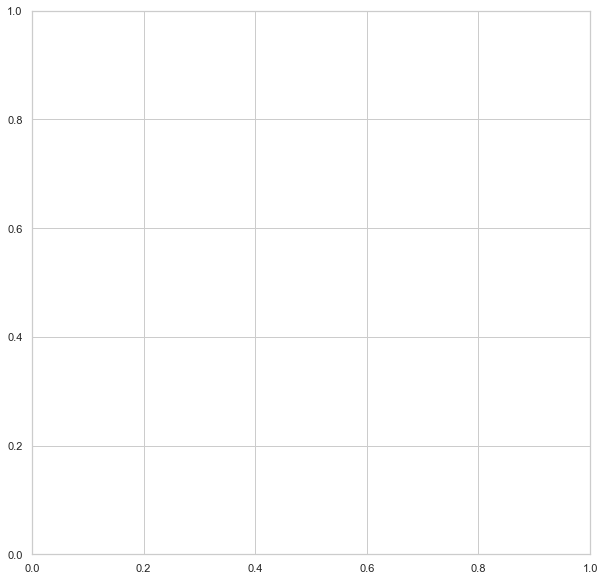

In [5]:
import seaborn
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(pvalues, xticklabels=tickers, yticklabels=tickers, cmap='RdYlGn_r'
                , mask = (pvalues >= 0.05)
                )
print(type(pairs))

In [6]:
# import pickle
# with open('pairs.pkl', 'wb') as f:
#     pickle.dump(pairs, f)
    
pairs=pd.read_pickle('pairs.pkl')
print(pairs)

[('ALL ORDINARIES_2007-01-02-2022-01-25', 'CAC 40_2007-01-02-2022-01-25'), ('ALL ORDINARIES_2007-01-02-2022-01-25', 'DAX PERFORMANCE-INDEX_2007-01-02-2022-01-25'), ('ALL ORDINARIES_2007-01-02-2022-01-25', 'Dow Jones Industrial Average_2007-01-03-2022-01-25'), ('ALL ORDINARIES_2007-01-02-2022-01-25', 'Euronext 100 Index_2007-01-02-2022-01-25'), ('ALL ORDINARIES_2007-01-02-2022-01-25', 'MERVAL_2007-01-02-2022-01-25'), ('ALL ORDINARIES_2007-01-02-2022-01-25', 'NASDAQ Composite_2007-01-03-2022-01-25'), ('ALL ORDINARIES_2007-01-02-2022-01-25', 'Nikkei 225_2007-01-04-2022-01-25'), ('ALL ORDINARIES_2007-01-02-2022-01-25', 'NYSE COMPOSITE (DJ)_2007-01-03-2022-01-25'), ('ALL ORDINARIES_2007-01-02-2022-01-25', 'Russell 2000_2007-01-03-2022-01-25'), ('ALL ORDINARIES_2007-01-02-2022-01-25', 'S_P 500_2007-01-03-2022-01-25'), ('ALL ORDINARIES_2007-01-02-2022-01-25', 'S_P BSE SENSEX_2007-01-02-2022-01-25'), ('ALL ORDINARIES_2007-01-02-2022-01-25', 'TSEC weighted index_2007-01-02-2022-01-25'), ('ALL O

In [7]:
from collections import Counter

counts = Counter(x[0] for x in pairs)
print(counts)


Counter({'Vix_2007-01-03-2022-01-25': 31, 'futures_LUMBER': 17, 'ALL ORDINARIES_2007-01-02-2022-01-25': 16, 'futures_LEAN_HOGS': 14, 'EURHUF=X_2007-01-01-2022-01-25': 13, 'MERVAL_2007-01-02-2022-01-25': 10, 'HANG SENG INDEX_2007-01-02-2022-01-25': 9, 'futures_COCOA': 9, 'DAX PERFORMANCE-INDEX_2007-01-02-2022-01-25': 8, 'futures_BRENT_OIL': 7, 'futures_COPPER': 7, 'CAC 40_2007-01-02-2022-01-25': 6, 'futures_CRUDE_OIL': 6, 'futures_OAT': 6, 'futures_SOYBEAN_MEAL': 6, 'CNY=X_2007-01-01-2022-01-25': 5, 'Dow Jones Industrial Average_2007-01-03-2022-01-25': 5, 'IDR=X_2007-01-01-2022-01-25': 5, 'Russell 2000_2007-01-03-2022-01-25': 5, 'futures_ROUGH_RICE': 5, 'BEL 20_2007-01-02-2022-01-25': 4, 'EURCAD=X_2007-01-01-2022-01-25': 4, 'Euronext 100 Index_2007-01-02-2022-01-25': 4, 'NASDAQ Composite_2007-01-03-2022-01-25': 4, 'S_P 500_2007-01-03-2022-01-25': 4, 'AUDUSD=X_2007-01-01-2022-01-25': 3, 'ESTX 50 PR': 3, 'EURGBP=X_2007-01-01-2022-01-25': 3, 'KOSPI Composite Index_2007-01-02-2022-01-25': 3

In [8]:

len(pairs)

275

In [9]:
S1 = df['futures_COPPER']
S2 = df['futures_SILVER']

score, pvalue, _ = coint(S1, S2)
print("%.4f" % pvalue)

0.0277


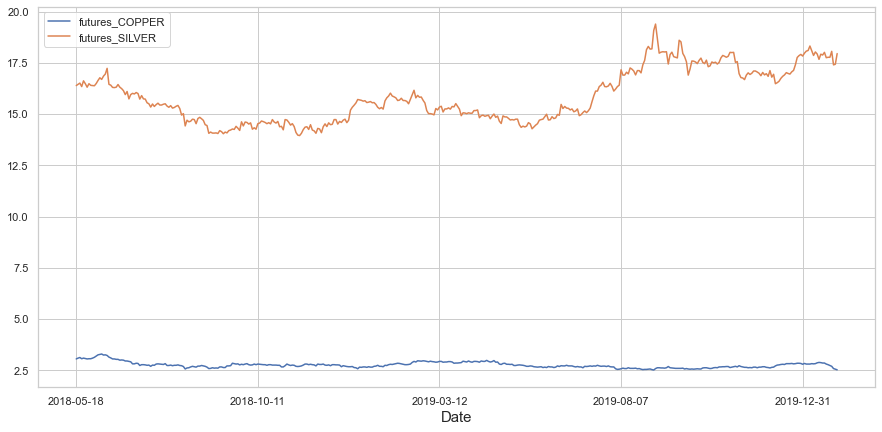

In [55]:
pd.concat([S1, S2], axis=1).plot(figsize=(15,7))
plt.show()

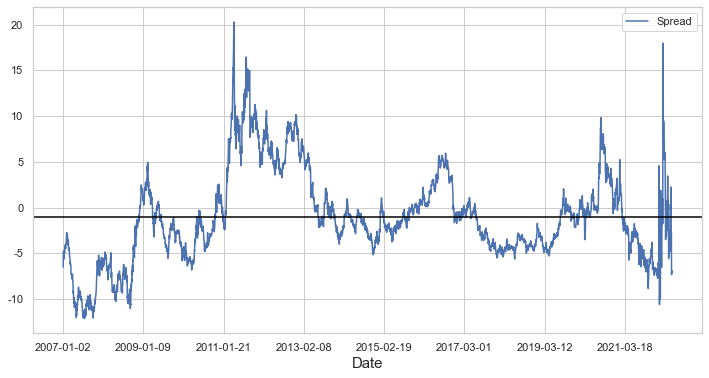

In [11]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['futures_COPPER']
b = results.params['futures_COPPER']

spread = S2 - b * S1
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
# plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Spread']);
##BLACK MEAN라인보다 위에 있으면 S2의 강세. MEAN라인 보다 밑에 있으면 S1의 강세

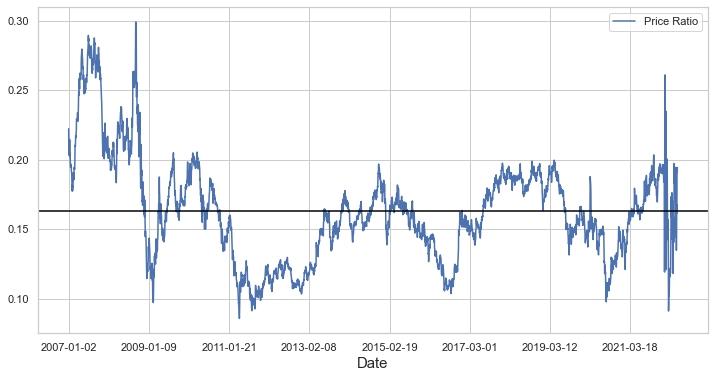

In [15]:
ratio = S1/S2
ratio.plot(figsize=(15,7))
plt.axhline(ratio.mean(), color='red')
plt.xlabel('Time')
plt.legend(['Price Ratio', 'Mean'])
plt.show()

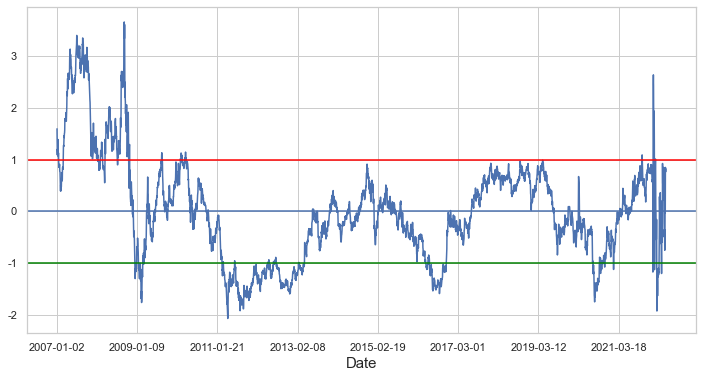

In [16]:
def zscore(series):
    return (series - series.mean()) / np.std(series)


zscore(ratio).plot(figsize=(12,6))
plt.axhline(zscore(ratio).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
# plt.xlim('2013-01-01', '2018-01-01')
plt.show()

In [17]:
ratios = df['futures_COPPER'] / df['futures_SILVER'] 
print(len(ratios) * .85 ) 

3224.9


In [18]:
train = ratios[:3225]
test = ratios[3224:]

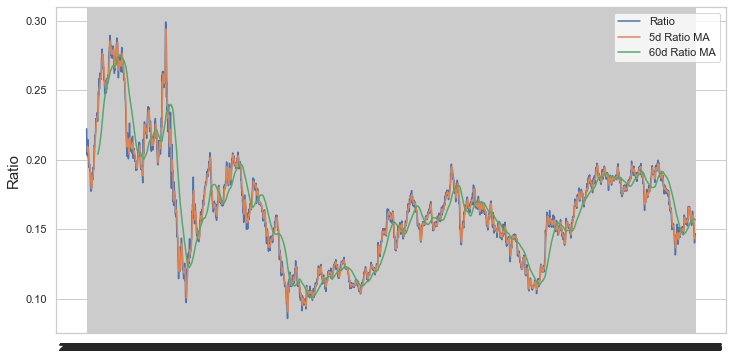

In [19]:
ratios_mavg5 = train.rolling(window=5, center=False).mean()
ratios_mavg60 = train.rolling(window=60, center=False).mean()
std_60 = train.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

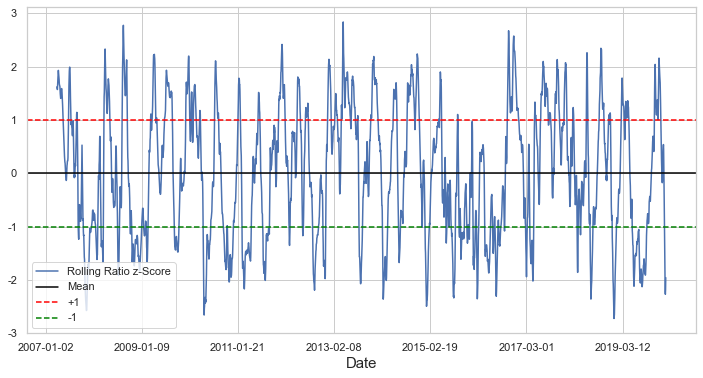

In [20]:
plt.figure(figsize=(12,6))
zscore_60_5.plot()
# plt.xlim('2013-03-25', '2016-07-01')
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

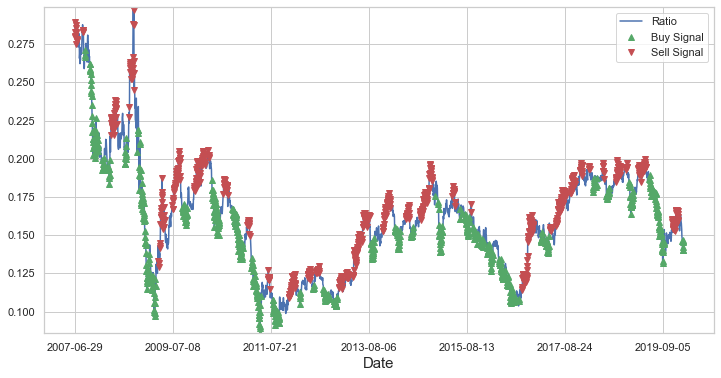

In [71]:
plt.figure(figsize=(12,6))

train[120:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[120:].plot(color='g', linestyle='None', marker='^')
sell[120:].plot(color='r', linestyle='None', marker='v')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratios.min(), ratios.max()))
# plt.xlim('2013-08-15','2016-07-07')
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

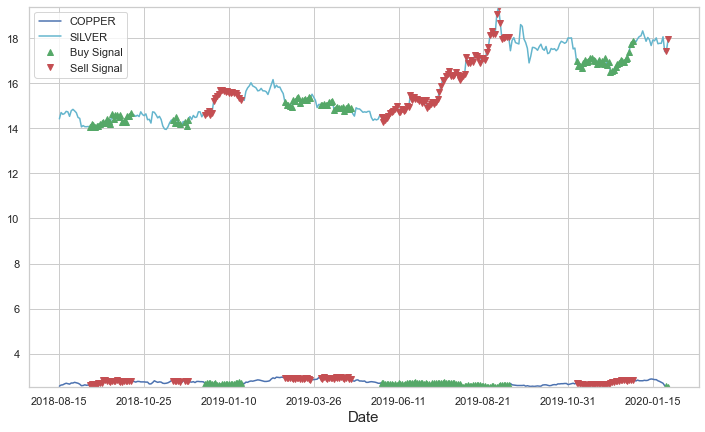

In [41]:
plt.figure(figsize=(12,7))
S1 = df['futures_COPPER'].iloc[2800:3220]
S2 = df['futures_SILVER'].iloc[2800:3220]

S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='v')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
# plt.ylim(25, 105)
# plt.xlim('2013-03-22', '2016-07-04')

plt.legend(['COPPER', 'SILVER', 'Buy Signal', 'Sell Signal'])
plt.show()

In [65]:
# Trade using a simple strategy
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] < -1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
#             print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))

        # Buy long if the z-score is < -1
        elif zscore[i] > 1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
#             print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))

            #print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.5:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
#             print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
            
            
    return money
trade(df['futures_COPPER'].iloc[:3224], df['futures_SILVER'].iloc[:3224], 5, 60)

47.76686593909818

In [66]:
##Test Data
trade(df['futures_COPPER'].iloc[3224:], df['futures_SILVER'].iloc[3224:], 5,90)

59.247237627349044

In [48]:
# Find the window length 0-254 
# that gives the highest returns using this strategy
length_scores = [trade(df['futures_COPPER'].iloc[:3224], 
                df['futures_SILVER'].iloc[:3224], 5, l) 
                for l in range(255)]
best_length = np.argmax(length_scores)
print ('Best window length:', best_length)

Best window length: 40


In [67]:
# Find the returns for test data
# using what we think is the best window length
length_scores2 = [trade(df['futures_COPPER'].iloc[3224:], 
                  df['futures_SILVER'].iloc[3224:],5, l) 
                  for l in range(255)]
print (best_length, 'day window:', length_scores2[best_length])

# Find the best window length based on this dataset, 
# and the returns using this window length
best_length2 = np.argmax(length_scores2)
print (best_length2, 'day window:', length_scores2[best_length2])

40 day window: 48.99801352538084
251 day window: 315.51713287031714


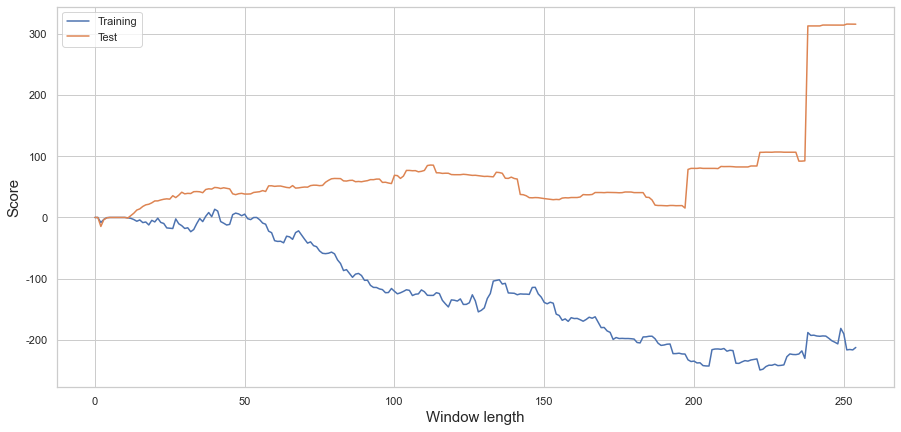

In [68]:
plt.figure(figsize=(15,7))
plt.plot(length_scores)
plt.plot(length_scores2)
plt.xlabel('Window length')
plt.ylabel('Score')
plt.legend(['Training', 'Test'])
plt.show()